### Notes on Week 3 - Basic Fixed Income Securities
__Present Value__

$PV(c,r) = c_{0} + \frac{c_{1}}{1+r} + ... + \frac{c_{N}}{(1+r)^N} = \Sigma_{k=0}^{N} \frac{c_{k}}{(1+r)^k}$

__Different Lending and Borrowing Rates__

In this scenario the Present value will have upper bound as Lending rate as $r_L > r_B$

Bounds on Prices 

$PV(c;r_B) <= P <= PV(c;r_L)$

__Annuity & Perpetuity__

Perpetuity = $\frac{A}{r}$

Annuity = Perpetuity - Perpetuity starting in year n+1 where n is between 0 and infinity

Annuity = $\frac{A}{r} * (1 - \frac{1}{(1+r)^n})$

__Bonds__

Yield to Maturity $\lambda$ is a crude measure to summarise face value, coupon, maturity and quality into a single measure. 

$P = \sum_{k=1}^{2T} \frac{c}{(1 + \frac{\lambda}{2})^k} + \frac{F}{(1 + \frac{\lambda}{2})^{2T}}$

Where P is the present value of all the coupons and the last return of Face Value. 

__Price of a Floating Rate Bond__

The price of a Floating Rate Bond is equal to its face Value. $P_f = F$

__Term structure of interest rates__

Interest rates depend on the term or duration of the loan. Why?
* Investors prefer their funds to be liquid rather than tied up.
* Investors have to be offered a higher rate to lock in funds for a longer period.
* Other explanations: expectation of future rates, market segmentation.

Spot Rate $s_t$ is the loan maturing in t years

A in year t  = $ PV = \frac{A}{(1+s_t)^t}$ 

Discount rate $d(0,t) = \frac{1}{(1+s_t)^t}$

Forward Rate $f_{uv}$ interest rate quoted for lending from year u to v  

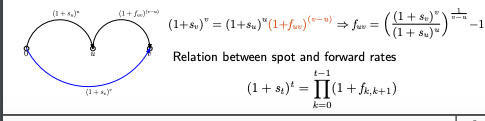

__Forward Contracts__

A forward contract gives the buyer the right, and also the obligation,to purchase
* a specified amount of an asset
* at a specified time T
* at a specified price F (called the forward price) set at time t = 0

The Forward price is set in such a way that at t=0 value of contract is 0 $f_0 = 0$. This makes Forward Price F as the discounted value of Current Spot Price

$F = \frac{S_{0}}{d(0,T)}$

Foward value $f_t$ for t > 0 what should it be ??

* at time 0: $f_0$ = 0
* at time T: $f_T = S_T − F$
* $F_0$: Forward price at time 0 for delivery at time T
* $F_t$: Forward price at time t for delivery at time T

| Cash Flow | t = t | t = T |
| -- | -- | -- |
| Short $F_t$ contract | 0 | $F_t$ - $S_t$ |
| Long $F_0$ contract | $-f_t$ | $S_T$ - $F_0$ |
| Net Cash Flow | $-f_t$ | $F_t$ - $F_0$ |


$f_t = (F_t - F_0)d(t, T)$

### Question 1
**Lottery payments**

A major lottery advertises that it pays the winner \\$10 million. However, this prize money is paid at the rate of \\$500,000 each year (with the first payment being immediate) for a total of 20 payments. What is the present value of this prize at 10% interest compounded annually?

Report your answer in $millions, rounded to two decimal places. For example, if you compute the answer to be 5.7124 million dollars then you should submit an answer of 5.71.

In [1]:
import numpy as np
rate = 0.1
pmt = 500000
nper = 20 
time_points = np.arange(0, 20, 1)
# discount_rate = np.exp(-1 * rate * time_points)
discount_rate = pow((1+rate), -1*time_points)
payments = (pmt * discount_rate) / 1000000
print ( f"The PV of the Lottery Payment is ${round(payments.sum(), 2)} millions")

The PV of the Lottery Payment is $4.68 millions


### Question 2
**Sunk Costs (Exercise 2.6 in Luenberger)**

A young couple has made a deposit of the first month's rent (equal to $1,000) on a 6-month apartment lease. The deposit is refundable at the end of six months if they stay until the end of the lease.

 The next day they find a different apartment that they like just as well, but its monthly rent is only $900. And they would again have to put a deposit of \\$900 refundable at the end of 6 months. 

They plan to be in the apartment only 6 months. Should they switch to the new apartment? Assume an (admittedly unrealistic!) interest rate of 12% per month compounded monthly.

In [2]:
rate = 0.12
deposit_1 = 1000
deposit_2 = 900
time = 6 
pv_of_deposit_1_in_6_months = deposit_1 * pow((1+rate), -1*6)
pv_of_deposit_2_in_6_months = deposit_2 * pow((1+rate), -1*6)
# print(pv_of_deposit_1_in_6_months, pv_of_deposit_2_in_6_months)
deposit_1_cash_value = -1*deposit_1 + pv_of_deposit_1_in_6_months
deposit_2_cash_value = -1* deposit_1 + -1*deposit_2 + pv_of_deposit_2_in_6_months
# print(deposit_1_cash_value, deposit_2_cash_value)
if deposit_1_cash_value > deposit_2_cash_value:
    print(f"Stay In the Property. Cash Value of Deposit 1 is ${deposit_1_cash_value}")
else:
    print(f"Switch into new Property. Cash Value of Deposit 2 is ${deposit_2_cash_value}")

Stay In the Property. Cash Value of Deposit 1 is $-493.36887882267945


### Question 3
**Relation between spot and discount rates**

Suppose the spot rates for 1 and 2 years are 
$s_{1} = 6.3 \%$ and $s_{2} = 6.9 \%$ with annual compounding. Recall that in this course, interest rates are always quoted on an annual basis unless otherwise specified. What is the discount rate 
$d(0,2)$ ?

Please submit your answer rounded to three decimal places. For example, if your answer is 0.4567 then you should submit an answer of 0.457.

In [3]:
s_1 = 6.3/100
s_2 = 6.9/100
d_0_2 = 1/pow((1+s_2), 2)
print(f"The discount rate is {np.round(d_0_2, 3)}")

The discount rate is 0.875


### Question 4
**Relation between spot and forward rates**

Suppose the spot rates for 1 and 2 years are 
$s_{1} = 6.3 \%$ and $s_{2} = 6.9 \%$ with annual compounding. Recall that in this course, interest rates are always quoted on an annual basis unless otherwise specified. What is the forward rate, 
$f_{1,2}$ assuming annual compounding?

Please submit your answer as a percentage rounded to one decimal place. For example, if your answer is 8.789% then you should submit an answer of 8.8.

In [4]:
s_1 = 6.3/100
s_2 = 6.9/100

f_1_2 = (pow((1+s_2), 2) / (1+s_1)) - 1
print(f"The f_1_2 forward rate is {np.round(f_1_2*100, 2)}")

The f_1_2 forward rate is 7.5


### Question 5
**Forward contract on a stock**

The current price of a stock is \\$400 per share and it pays no dividend. Assuming a constant interest rate of 8\% per year compounded quarterly, what is the stock's theoretical forward price for delivery in 9 months? 

 Please submit your answer rounded to two decimal places. For example, if your answer is 567.1234 then you should submit an answer of 567.12

In [5]:
rate = 0.08
# n is in years 
n = 9/12
delta_t = 4
s_0 = 400
forward_stock_price = s_0 * pow((1+rate/delta_t),(n*delta_t))
forward_stock_price
print(f"The forward stock price in {n} years is ${round(forward_stock_price, 2)}")

The forward stock price in 0.75 years is $424.48


### Question 6
**Bounds using different lending and borrowing rate**

Suppose the borrowing rate $r_{B}$ =10\% compounded annually. However, the lending rate (or equivalently, the interest rate on deposits) is only 
8\% compounded annually. 

Compute the difference between the upper and lower bounds on the price of a perpetuity that pays A=10,000$ per year.

Please submit your answer rounded to the nearest dollar. If your answer is 23,456.789 then you should submit an answer of 23457.

In [6]:
perpetual_amount = 10000
r_b = 0.1
r_l = 0.08

borrowing_bond_price = perpetual_amount / r_b
lending_bond_price = perpetual_amount / r_l
print(f"The upper bound is {lending_bond_price} and lower bound is {borrowing_bond_price}. The difference is {np.round((lending_bond_price - borrowing_bond_price), 0)}" )



The upper bound is 125000.0 and lower bound is 100000.0. The difference is 25000.0


### Question 7
**Value of a Forward contract at an intermediate time**

Suppose we hold a forward contract on a stock with expiration 6 months from now. We entered into this contract 6 months ago, so when we entered into the contract the expiration was T = 1 year. The stock prices 6 months ago was $S_{0} = 100$, then the stock price is 125 and current Interest rate is $r = 10\%$ compounded Semi Annually. (This is the same rate that prevailed 6 months ago). What is the current value of our forward contract?

Please submit your answer in dollars rounded to the nearest dollar. If your answer is 42.678 then you should submit an answer of 43.


In [7]:
import pandas as pd
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays a dollar at time period t
    and r is the per-period interest rate
    returns a |t| x |r| Series or DataFrame
    r can be a float, Series or DataFrame
    returns a DataFrame indexed by t
    """
    discounts = pd.DataFrame([(r + 1) ** -i for i in t])
    discounts.index = t
    return discounts
r = 0.1
S_0 = 100
S_t = 125
d_0_2 =1/pow(1+0.1/2, 2)
d_1_2 = 1/pow(1+0.1/2, 1)
F_0 = S_0/d_0_2
F_t = S_t/d_1_2
f_t = np.round((F_t - F_0)*d_1_2)
f_t

20.0